# Exploratory Data Analysis on "cases_train.csv"



In [580]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('cases_train.csv')
df.head()


,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Delhi,India,28.614740,77.209100,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered
1,NaN,NaN,Uttar Pradesh,India,25.436090,81.847180,20.05.2020,NaN,https://t.me/indiacovid/5222,hospitalized
2,NaN,NaN,Maharashtra,India,18.504220,73.853020,26.05.2020,NaN,https://t.me/indiacovid/5601,hospitalized
3,15-34,female,Baden-Wurttemberg,Germany,48.120860,7.849500,15.03.2020,NaN,NaN,nonhospitalized
4,NaN,NaN,Gujarat,India,23.188409,73.647122,20.05.2020,NaN,https://twitter.com/PIBAhmedabad/status/126311...,hospitalized


In [384]:
Area = (df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())

print(Area)

(-159.72759647299998, 174.74, -54.808029999999974, 70.0718)


### Location that have Covid Cases on Training Dataset - longitude & latitude

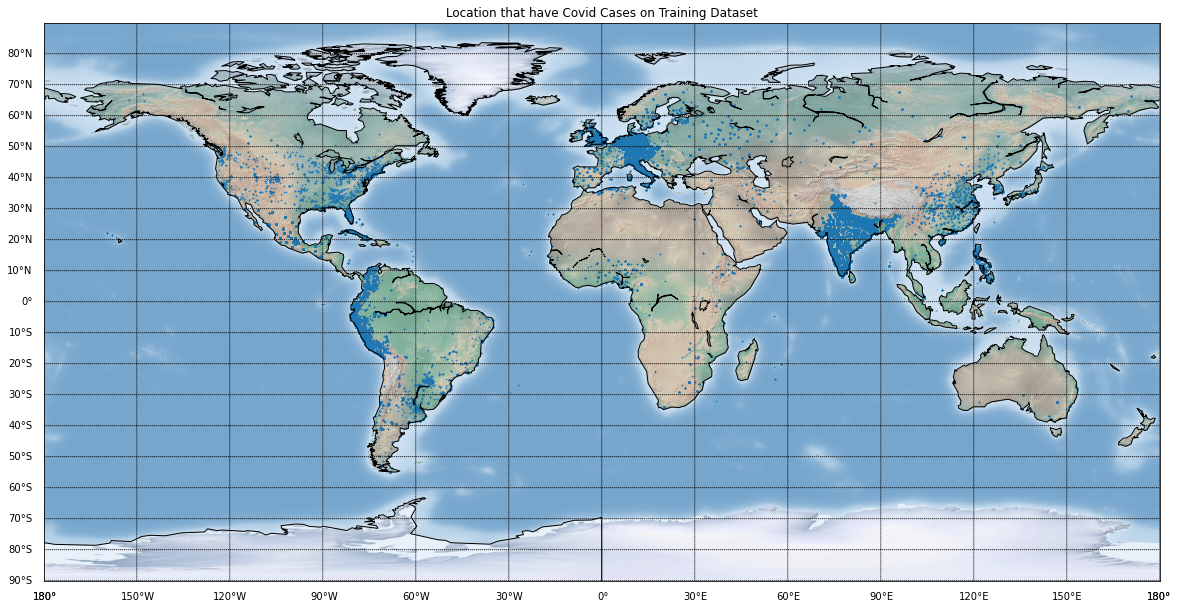

In [543]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(20,20))
m = Basemap(projection='cyl',
 llcrnrlat = -90,
 urcrnrlat = 90,
 llcrnrlon = -180,
 urcrnrlon = 180,
 resolution = 'c')
m.shadedrelief()

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
m.scatter(df.longitude,df.latitude,latlon=True,s=0.5)
plt.title('Location that have Covid Cases on Training Dataset')
plt.show()

### Distribution of the attributes

Text(0.5, 1.0, 'Distribution of the longitude ')

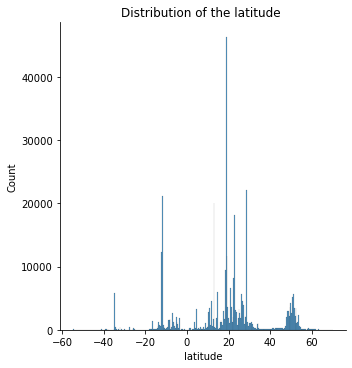

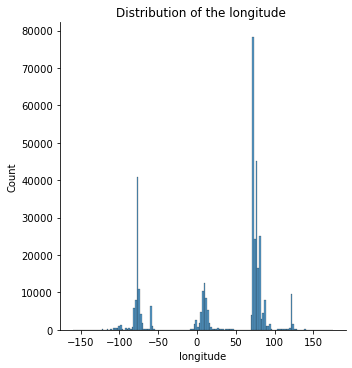

In [445]:
import seaborn as sns
dlg=sns.displot(df['latitude'],kde=False)
plt.title('Distribution of the latitude ')

sns.displot(df['longitude'],kde=False)
plt.title('Distribution of the longitude ')

Text(0.5, 1.0, 'Covid-19 Cases in Gender')

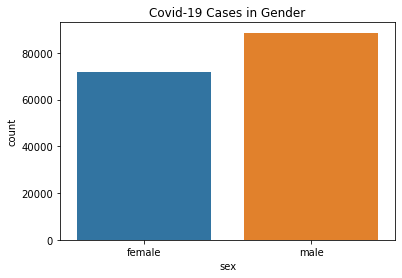

In [399]:
sns.countplot(data = df, x='sex')
plt.title('Covid-19 Cases in Gender')

Text(0.5, 1.0, 'The Outcome form Covid-19 Cases')

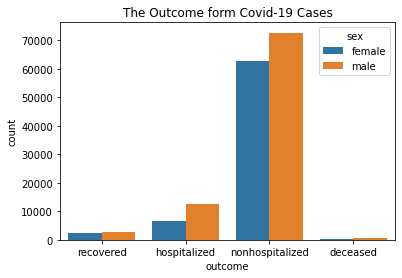

In [529]:
sns.countplot(data = df, x='outcome',hue='sex')
plt.title('The Outcome form Covid-19 Cases')

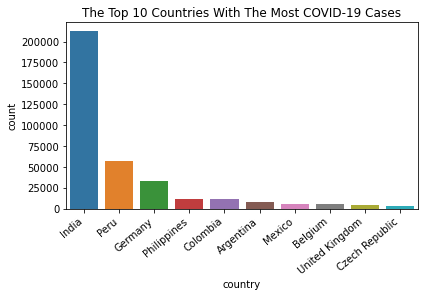

In [419]:
ax = sns.countplot(data = df, x='country', order=df.country.value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('The Top 10 Countries With The Most COVID-19 Cases')
plt.show()

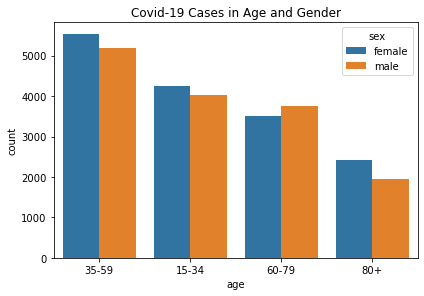

In [425]:
ax = sns.countplot(data = df, x='age', hue='sex',order=df.age.value_counts().iloc[:4].index)
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.title('Covid-19 Cases in Age and Gender')
plt.show()

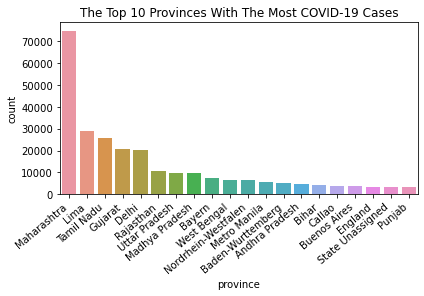

In [426]:
ax = sns.countplot(data = df, x='province', order=df.province.value_counts().iloc[:20].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('The Top 10 Provinces With The Most COVID-19 Cases')
plt.show()

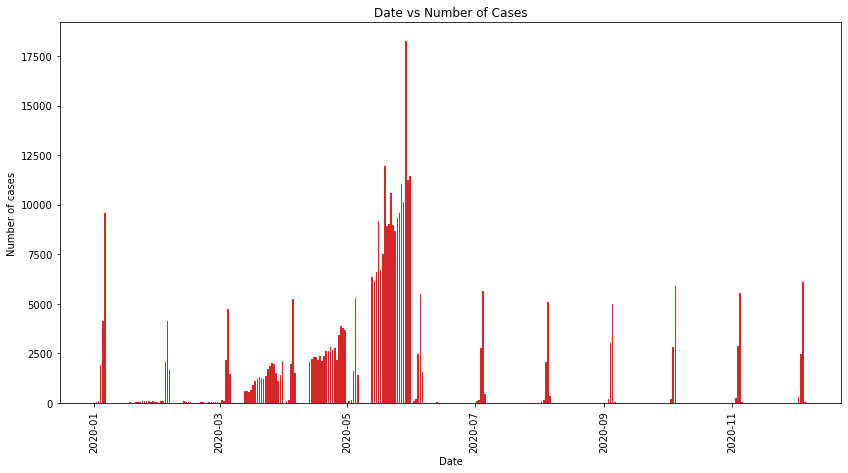

In [587]:
color = sns.color_palette()
df['date_confirmation'] = pd.to_datetime(df["date_confirmation"])
df["date"] = df["date_confirmation"].dt.date
count = df["date"].value_counts()
plt.figure(figsize=(14,7))
axis = plt.subplot(111)
axis.bar(count.index, count.values, color=color[3])
axis.xaxis_date()
plt.xticks(rotation='vertical')
plt.title('Date vs Number of Cases')
plt.ylabel("Number of cases")
plt.xlabel("Date")
plt.show()

### Countries against the 4 categories of outcome: hospitalized, recovered, nonhospitalized, and deceased

Text(0.5, 1.0, 'Hospitalized vs Countries')

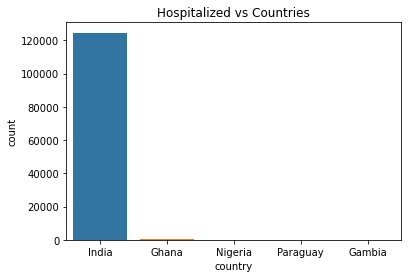

In [595]:
hos=df.loc[df.outcome=='hospitalized']
sns.countplot(data = hos, x='country', order=hos.country.value_counts().iloc[:5].index)
plt.title('Hospitalized vs Countries')

Text(0.5, 1.0, 'Recovered vs Countries')

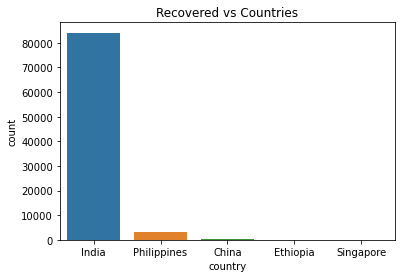

In [596]:
hos=df.loc[df.outcome=='recovered']
sns.countplot(data = hos, x='country', order=hos.country.value_counts().iloc[:5].index)
plt.title('Recovered vs Countries')

Text(0.5, 1.0, 'Non-hospitalized vs Countries')

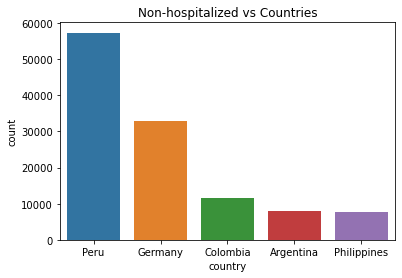

In [598]:
hos=df.loc[df.outcome=='nonhospitalized']
sns.countplot(data = hos, x='country', order=hos.country.value_counts().iloc[:5].index)
plt.title('Non-hospitalized vs Countries')

Text(0.5, 1.0, 'Deceased vs Countries')

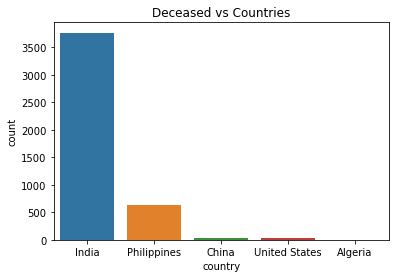

In [597]:
hos=df.loc[df.outcome=='deceased']
sns.countplot(data = hos, x='country', order=hos.country.value_counts().iloc[:5].index)
plt.title('Deceased vs Countries')

# Exploratory Data Analysis on "location.csv"

In [609]:
dl=pd.read_csv('location.csv')


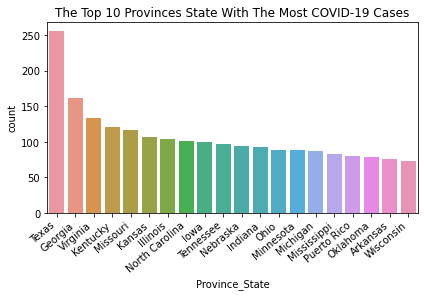

In [438]:
ax = sns.countplot(data = dl, x='Province_State', order=dl.Province_State.value_counts().iloc[:20].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('The Top 10 Province_States With The Most COVID-19 Cases')
plt.show()

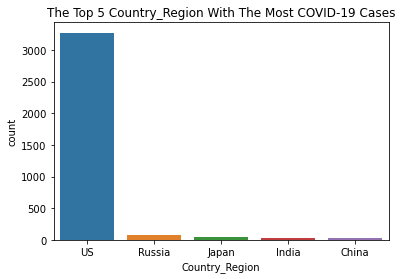

In [444]:
sns.countplot(data = dl, x='Country_Region', order=dl.Country_Region.value_counts().iloc[:5].index)
plt.title('The Top 5 Country_Region With The Most COVID-19 Cases')
plt.show()

### Distribution of the attributes

Text(0.5, 1.0, 'Distribution of the latitude')

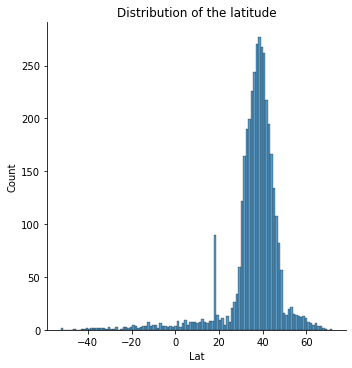

In [442]:
sns.displot(dl['Lat'],kde=False)
plt.title('Distribution of the latitude')

Text(0.5, 1.0, 'Distribution of the longitude ')

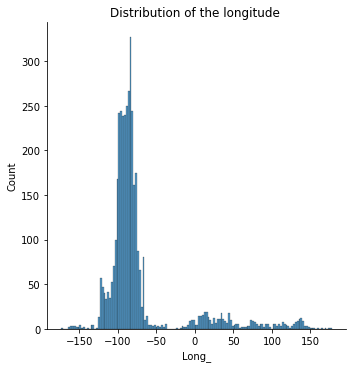

In [446]:
sns.displot(dl['Long_'],kde=False)
plt.title('Distribution of the longitude ')

Text(0.5, 1.0, 'Distribution of the Incidence_Rate')

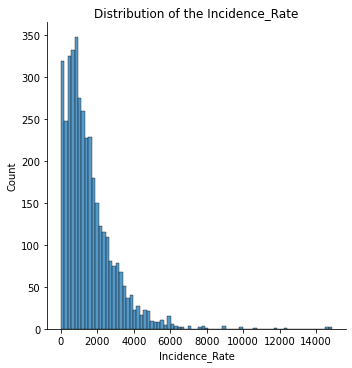

In [601]:
sns.displot(dl['Incidence_Rate'],kde=False)
plt.title('Distribution of the Incidence_Rate')

Text(0.5, 1.0, 'Distribution of the Case-Fatality_Ratio')

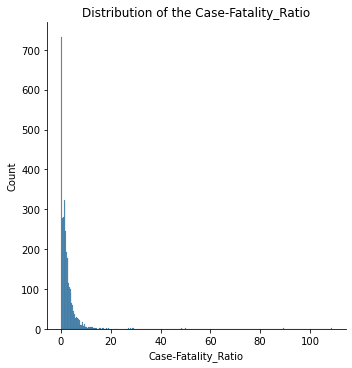

In [602]:
sns.displot(dl['Case-Fatality_Ratio'],kde=False)
plt.title('Distribution of the Case-Fatality_Ratio')

### Country Regions and Province States With the Highest Incidence Rate and Case-Fatality_Ratio

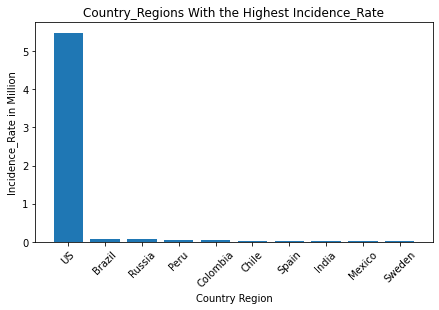

In [619]:
aggregation_functions = {'Incidence_Rate': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Incidence_Rate'],ascending=False).iloc[:10]
plt.bar(df_new.Country_Region, df_new.Incidence_Rate/10**6)
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Country_Regions With the Highest Incidence_Rate')
plt.ylabel("Incidence_Rate in Million")
plt.xlabel("Country Region")
plt.show()

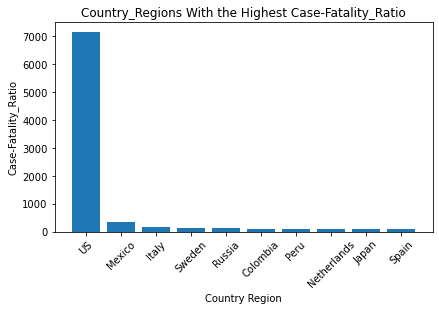

In [617]:
aggregation_functions = {'Case-Fatality_Ratio': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Case-Fatality_Ratio'],ascending=False).iloc[:10]
plt.bar(df_new.Country_Region, df_new['Case-Fatality_Ratio'])
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Country_Regions With the Highest Case-Fatality_Ratio')
plt.ylabel("Case-Fatality_Ratio")
plt.xlabel("Country Region")
plt.show()

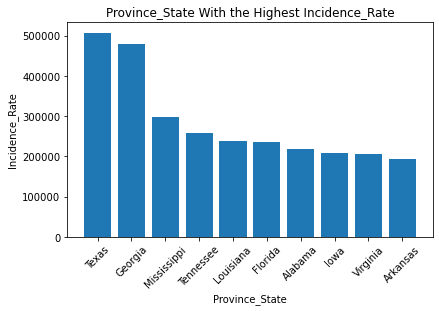

In [624]:
aggregation_functions = {'Incidence_Rate': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new = df_new.sort_values(by=['Incidence_Rate'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new['Incidence_Rate'])
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Province_State With the Highest Incidence_Rate')
plt.ylabel("Incidence_Rate")
plt.xlabel("Province_State")
plt.show()

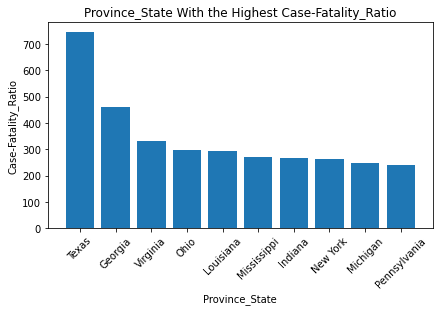

In [625]:
aggregation_functions = {'Case-Fatality_Ratio': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new = df_new.sort_values(by=['Case-Fatality_Ratio'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new['Case-Fatality_Ratio'])
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Province_State With the Highest Case-Fatality_Ratio')
plt.ylabel("Case-Fatality_Ratio")
plt.xlabel("Province_State")
plt.show()

### Country_Regions With the highest amount of Confirmed,Death,Recovered and Active

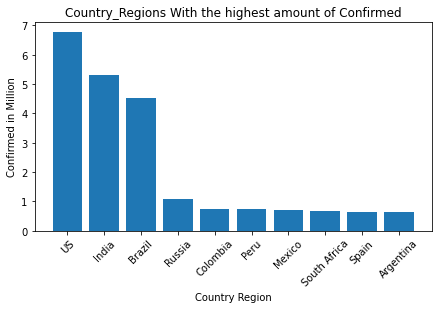

In [507]:
aggregation_functions = {'Confirmed': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Confirmed'],ascending=False).iloc[:10]
plt.bar(df_new.Country_Region, df_new.Confirmed/10**6)
#sns.lineplot(data = df_new, x='Country_Region', y='Confirmed')
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Country_Regions With the highest amount of Confirmed')
plt.ylabel("Confirmed in Million")
plt.xlabel("Country Region")
plt.show()

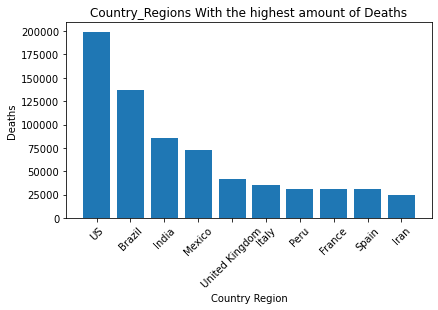

In [499]:
#sns.catplot(data = dl, x='Recovered', y='Country_Region', order=dl.Recovered.value_counts().iloc[:5].index)
aggregation_functions = {'Deaths': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Deaths'],ascending=False).iloc[:10]
#plt.plot(df_new.Country_Region, df_new.Deaths)
#sns.lineplot(data = df_new, x='Country_Region', y='Deaths')
plt.bar(df_new.Country_Region, df_new.Deaths)
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Country_Regions With the highest amount of Deaths')
plt.ylabel("Deaths")
plt.xlabel("Country Region")
plt.show()

#x=df_new.nlargest(5, 'Deaths')
#plt.plot(df_new.Country_Region,x.Deaths)
#plt.show()

#print(x)
#print(dl.Country_Region.value_counts().iloc[:5])

#plt.xticks(x.Country_Region.loc[:5],rotation=40)
#plt.plot(df_new.Country_Region,df_new.Deaths)

#sns.lineplot(data = df_new, x='Country_Region', y='Deaths')


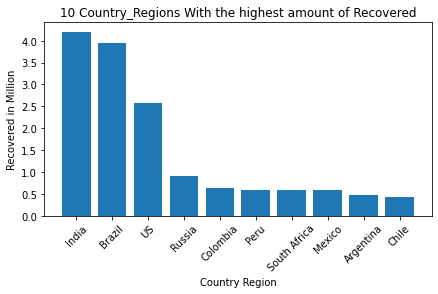

In [506]:
#plt.plot(dl.Country_Region,dl.Recovered/10**6)
aggregation_functions = {'Recovered': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Recovered'],ascending=False).iloc[:10]
plt.bar(df_new.Country_Region, df_new.Recovered/10**6)
#sns.lineplot(data = df_new, x='Country_Region', y='Recovered')
plt.title('10 Country_Regions With the highest amount of Recovered')
plt.xticks(rotation='45')
plt.tight_layout()
plt.ylabel("Recovered in Million")
plt.xlabel("Country Region")
plt.show()

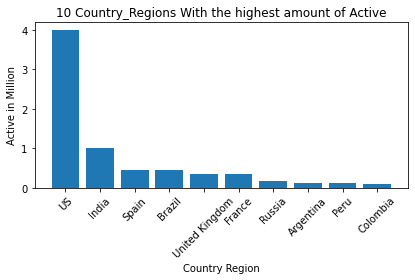

In [504]:
aggregation_functions = {'Active': 'sum','Country_Region':'first'}
df_new = dl.groupby(dl['Country_Region']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Active'],ascending=False).iloc[:10]
plt.bar(df_new.Country_Region, df_new.Active/10**6)
#sns.lineplot(data = df_new, x='Country_Region', y='Active')
plt.title('10 Country_Regions With the highest amount of Active')
plt.xticks(rotation='45')
plt.ylabel("Active in Million")
plt.xlabel("Country Region")
plt.tight_layout()
plt.show()

### Province_State With the highest amount of Confirmed,Death,Recovered and Active

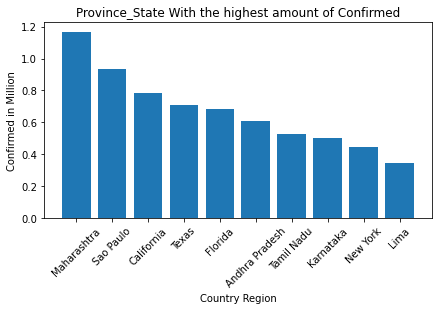

In [604]:
aggregation_functions = {'Confirmed': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Confirmed'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new.Confirmed/10**6)
#sns.lineplot(data = df_new, x='Country_Region', y='Confirmed')
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Province_State With the highest amount of Confirmed')
plt.ylabel("Confirmed in Million")
plt.xlabel("Country Region")
plt.show()

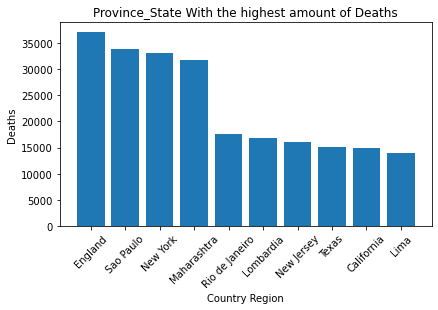

In [605]:
aggregation_functions = {'Deaths': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Deaths'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new.Deaths)
plt.xticks(rotation='45')
plt.tight_layout()
plt.title('Province_State With the highest amount of Deaths')
plt.ylabel("Deaths")
plt.xlabel("Country Region")
plt.show()


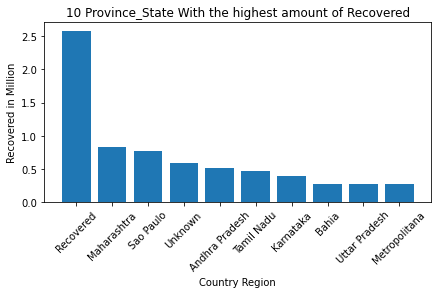

In [606]:
aggregation_functions = {'Recovered': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Recovered'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new.Recovered/10**6)
plt.title('10 Province_State With the highest amount of Recovered')
plt.xticks(rotation='45')
plt.tight_layout()
plt.ylabel("Recovered in Million")
plt.xlabel("Country Region")
plt.show()

result: we could see that "Recovered" is not a Province_State, it is a outlier here

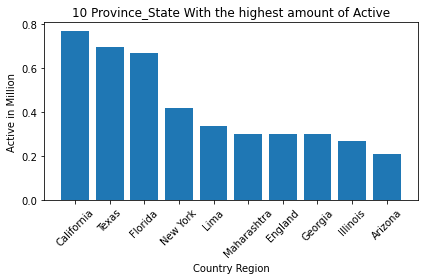

In [608]:
aggregation_functions = {'Active': 'sum','Province_State':'first'}
df_new = dl.groupby(dl['Province_State']).aggregate(aggregation_functions).reindex(columns=dl.columns)
df_new.head()
df_new = df_new.sort_values(by=['Active'],ascending=False).iloc[:10]
plt.bar(df_new.Province_State, df_new.Active/10**6)
plt.title('10 Province_State With the highest amount of Active')
plt.xticks(rotation='45')
plt.ylabel("Active in Million")
plt.xlabel("Country Region")
plt.tight_layout()
plt.show()

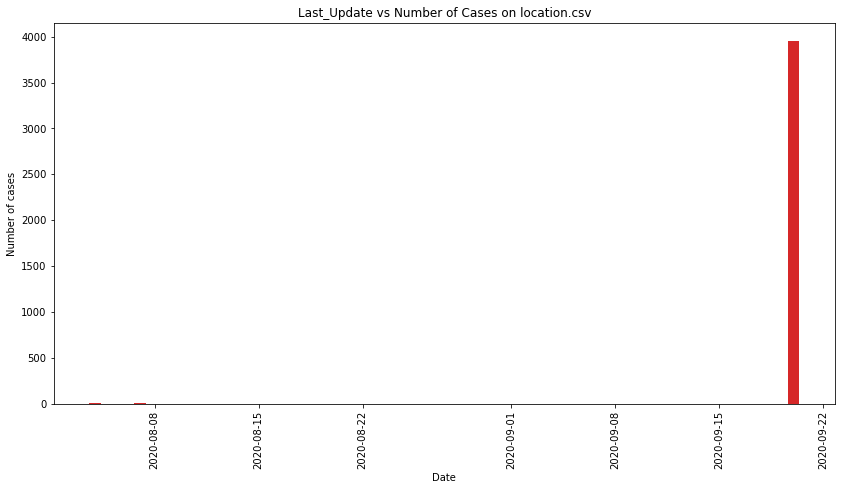

In [600]:
color = sns.color_palette()
dl['Last_Update'] = pd.to_datetime(dl["Last_Update"])
dl["date"] = dl["Last_Update"].dt.date
count = dl["date"].value_counts()
plt.figure(figsize=(14,7))
axis = plt.subplot(111)
axis.bar(count.index, count.values, color=color[3])
axis.xaxis_date()
plt.xticks(rotation='vertical')
plt.title('Last_Update vs Number of Cases on location.csv')
plt.ylabel("Number of cases")
plt.xlabel("Date")
plt.show()

## Print the number of missing values for every attribute from "cases_train.csv"

In [626]:
#missing_date = df.loc[df['date_confirmation'].isnull()]
#print(len(missing_date))
print ("The number of missing data in age is", len(df.loc[df['age'].isnull()]))
print ("The number of missing data in sex is", len(df.loc[df['sex'].isnull()]))
print ("The number of missing data in province is", len(df.loc[df['province'].isnull()]))
print ("The number of missing data in country is", len(df.loc[df['country'].isnull()]))
print ("The number of missing data in latitude is", len(df.loc[df['latitude'].isnull()]))
print ("The number of missing data in longitude is", len(df.loc[df['longitude'].isnull()]))
print ("The number of missing data in date_confirmation is", len(df.loc[df['date_confirmation'].isnull()]))
print ("The number of missing data in additional_information is", len(df.loc[df['additional_information'].isnull()]))
print ("The number of missing data in source is", len(df.loc[df['source'].isnull()]))
print ("The number of missing data in outcome is", len(df.loc[df['outcome'].isnull()]))


The number of missing data in age is 209265
The number of missing data in sex is 207084
The number of missing data in province is 4106
The number of missing data in country is 18
The number of missing data in latitude is 2
The number of missing data in longitude is 2
The number of missing data in date_confirmation is 0
The number of missing data in additional_information is 344912
The number of missing data in source is 128478
The number of missing data in outcome is 0


## Print the number of missing values for every attribute from "location.csv"

In [554]:
print ("The number of missing data in Province_State is", len(dl.loc[dl['Province_State'].isnull()]))
print ("The number of missing data in Country_Region is", len(dl.loc[dl['Country_Region'].isnull()]))
print ("The number of missing data in Last_Update is", len(dl.loc[dl['Last_Update'].isnull()]))
print ("The number of missing data in latitude is", len(dl.loc[dl['Lat'].isnull()]))
print ("The number of missing data in longitude is", len(dl.loc[dl['Long_'].isnull()]))
print ("The number of missing data in Confirmed is", len(dl.loc[dl['Confirmed'].isnull()]))
print ("The number of missing data in Deaths is", len(dl.loc[dl['Deaths'].isnull()]))
print ("The number of missing data in Recovered is", len(dl.loc[dl['Recovered'].isnull()]))
print ("The number of missing data in Active is", len(dl.loc[dl['Active'].isnull()]))
print ("The number of missing data in Combined_Key is", len(dl.loc[dl['Combined_Key'].isnull()]))
print ("The number of missing data in Incidence_Rate is", len(dl.loc[dl['Incidence_Rate'].isnull()]))
print ("The number of missing data in Case-Fatality_Ratio is", len(dl.loc[dl['Case-Fatality_Ratio'].isnull()]))

The number of missing data in Province_State is 168
The number of missing data in Country_Region is 0
The number of missing data in Last_Update is 0
The number of missing data in latitude is 80
The number of missing data in longitude is 80
The number of missing data in Confirmed is 0
The number of missing data in Deaths is 0
The number of missing data in Recovered is 0
The number of missing data in Active is 2
The number of missing data in Combined_Key is 0
The number of missing data in Incidence_Rate is 80
The number of missing data in Case-Fatality_Ratio is 48
